## 파이토치로 다층 퍼셉트론 구현하기

In [2]:
import torch
import torch.nn as nn

In [4]:
#GPU 연산
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [15]:
# data
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [16]:
#모델 설계
model = nn.Sequential(
        nn.Linear(2, 10, bias = True),
        nn.Sigmoid(),
        nn.Linear(10, 10, bias=True),
        nn.Sigmoid(),
        nn.Linear(10, 10, bias=True),
        nn.Sigmoid(),
        nn.Linear(10, 1,  bias=True),
        nn.Sigmoid()
        ).to(device)

In [17]:
#비용함수, 옵티마이저 선언
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 1)

In [18]:
for epoch in range(10001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.7408947944641113
100 0.6931389570236206
200 0.6931374669075012
300 0.6931358575820923
400 0.6931341886520386
500 0.6931324005126953
600 0.693130612373352
700 0.6931287050247192
800 0.6931267380714417
900 0.6931245923042297
1000 0.6931224465370178
1100 0.693120002746582
1200 0.6931174993515015
1300 0.693114697933197
1400 0.693111777305603
1500 0.6931086182594299
1600 0.6931051015853882
1700 0.6931012868881226
1800 0.6930969953536987
1900 0.6930922865867615
2000 0.693087100982666
2100 0.693081259727478
2200 0.6930745840072632
2300 0.6930670738220215
2400 0.6930586099624634
2500 0.6930487155914307
2600 0.6930371522903442
2700 0.6930237412452698
2800 0.6930078268051147
2900 0.6929886341094971
3000 0.6929655075073242
3100 0.6929367780685425
3200 0.6929006576538086
3300 0.6928542852401733
3400 0.6927932500839233
3500 0.692710280418396
3600 0.692592978477478
3700 0.6924186944961548
3800 0.6921423673629761
3900 0.6916618347167969
4000 0.6907041072845459
4100 0.688315749168396
4200 0.679061

### 학습된 다층 퍼셉트론의 예측값 확인하기

In [19]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[6.8889945e-05]
 [9.9988139e-01]
 [9.9989212e-01]
 [1.5677068e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


## 비선형 활성화 함수(Activation function) in PyTorch

In [22]:
#라이브러리
import numpy as np
import matplotlib.pyplot as plt #맷플롯립 사용

- 선형함수를 활성화 함수로 사용시에 여러 층을 쌓는다 할지라도 1회 추가한것과 차이가 없다.
- 따라서 비선형 함수를 활성화 함수로 사용하여야 한다.
- 원점 중심이 아니다(Not-zero-centerd), 따라서, 평균이 0이 아닌 0.5이고, 이로 인해 항상 양수를 출력한다. 따라서 출력의 가중치 합이 음수가 섞여 있는 입력의 가중치 합보다 커질 가능성이 높다. 이를 편향 이동이라 부르고, 이러한 이유로 각 레이어를 지날때마다 분산이 커지고 활성화 함수의 기울기 소실 문제가 발생할 수 있다는 단점이 있다.

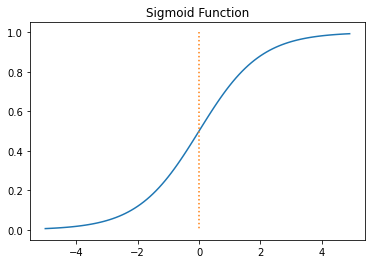

In [23]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x =  np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

#### 기울기 소실 문제(Vanishing Gradient)
- 주황색 부분의 기울기를 계산할시에 0에 가까운 아주 작은 값이 나온다.
-  앞단에서 기울기 전파를 받지 못해 매개변수 W가 업데이트 되지 않아 학습이 진행되지 않는다.
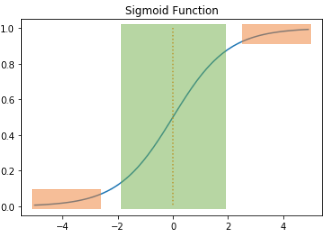
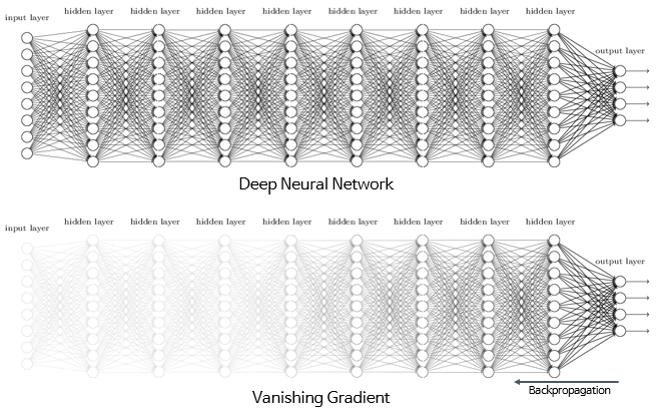

#### 하이포볼릭탄젠트 함수(Hyperbolic tangent function)
- 시그모이드 함수를 보완하기 위한 함수지만 +=5이상에서는 기울기 소실 문제가 발생한다는 한계가 있음.
- 그림으로 봐도 -1와1에 가까운 출력값을 출력시 시그모이드 함수와 비슷

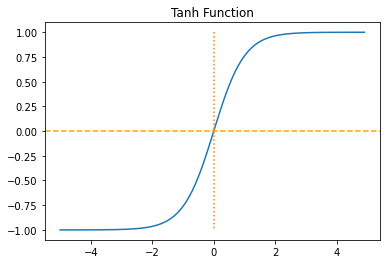

In [45]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

#시각화
plt.plot(x, y)
plt.plot([0, 0],[1.0, -1.0], ":")
plt.axhline(y = 0, color='orange', linestyle = '--') #x축 표시
plt.title('Tanh Function')
plt.show()

#### 렐루 함수(ReLU)
- 수식은 f(x) = max(0, x)로 매우 간단합니다.
- 특정 양수 값에 수렴하지 않아 잘 작동하며 인기가 많다.
- 단점 : 음수 범위에서 기울기가 0이 되고 이를 죽은 렐루라고 부른다.

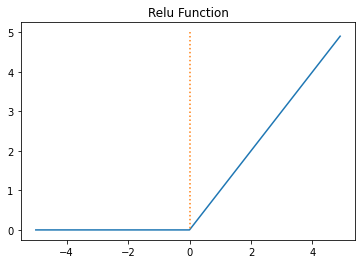

In [36]:
def relu(x):
    return np.maximum(0, x)

x =  np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0], [5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

#### 리키 렐루(Leaky ReLU)
- f(x) = max(ax, x)로 간단하다.
- 입력값이 음수일 경우 0이 아니라 0001과 같은 매우 작은 수를 반환
- a는 하이퍼파리미터로 Leak

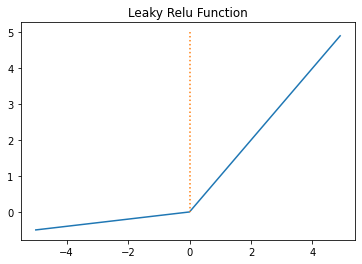

In [41]:
a = 0.1
def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0], [5.0, 0.0], ':')
plt.title('Leaky Relu Function')
plt.show()

#### 소프트맥스 함수(Softmax Function)
- 분류 문제를 로즈스틱 회귀와 소프트맥스 회귀를 출력층에 적용할 때 주로 사용한다.

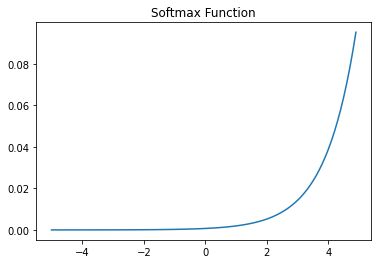

In [43]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

|문제 |활성화 함수|비용 함수|
|------|---|---|
|이진 분류|시그모이드|nn.BCELoss()|
|다중 클래스 분류|소프트맥스|nn.CrossEntropyLoss()|
|회귀|없음|MSE|
- nn.CrossEntropyLoss()는 소프트맥수 함수를 이미 포함하고 있다.

## 다층 퍼셉트론으로 손글씨 분류하기
- MNIST 데이터랑은 다른 데이터

In [49]:
#숫자 필기 데이터 소개
%matplotlib inline 
#쥬피터를 실행한 브라우져에서 그림(inline)을 바로 볼수 있게 해주는 기능
import matplotlib.pyplot as plt #시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits()

In [50]:
print(digits.images[0])
#얼핏 0을 흰색 나머지 숫자를 검은색이라 생각시에 0처럼 보인다.

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [51]:
print(digits.target[0])

0


In [52]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


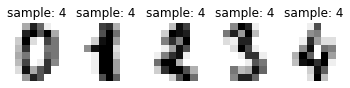

In [57]:
#상위 5개의 샘플 시각화
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, lable) in enumerate(images_and_labels[:5]):
    plt.subplot(2,5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation ='nearest')
    plt.title('sample: %i' % label)

In [59]:
for i in range(5):
    print(i, '번 인덱스 샘플의 레이블: ',digits.target[i])

0 번 인덱스 샘플의 레이블:  0
1 번 인덱스 샘플의 레이블:  1
2 번 인덱스 샘플의 레이블:  2
3 번 인덱스 샘플의 레이블:  3
4 번 인덱스 샘플의 레이블:  4


In [61]:
#digits.images는 행렬형태로 저장되어 있으므로 사용하기 편한 digits.data를 이용해본다. 64차원의 벡터로 저장된 상태이다.
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [63]:
X = digits.data #이미지, 즉 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

### 다층 퍼셉트론 분류기 만들기

In [65]:
import torch
import torch.nn as nn
from torch import optim

In [66]:
#모듈 설정
#주의할점은 마지막에 소프트맥스를 선언하지 않음 -  비용함수에 포함되어 있음.
model = nn.Sequential(
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, 10)
)

In [67]:
X = torch.tensor(X, dtype = torch.float32)
Y = torch.tensor(Y, dtype = torch.int64)

In [69]:
loss_fn = nn.CrossEntropyLoss()

In [70]:
optimizer = optim.Adam(model.parameters())

In [71]:
losses = []

In [74]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X) # forward 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

    losses.append(loss.item())
        

Epoch    0/100 Cost: 2.539521
Epoch   10/100 Cost: 2.065444
Epoch   20/100 Cost: 1.750491
Epoch   30/100 Cost: 1.405586
Epoch   40/100 Cost: 1.034466
Epoch   50/100 Cost: 0.729218
Epoch   60/100 Cost: 0.523930
Epoch   70/100 Cost: 0.392203
Epoch   80/100 Cost: 0.307188
Epoch   90/100 Cost: 0.249990


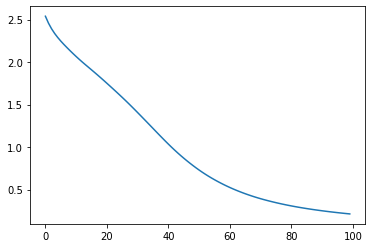

In [76]:
plt.plot(losses)

## 다층 퍼셉트론으로 MNIST 분류하기

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml

In [79]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [80]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [84]:
mnist.target[0]

'5'

In [87]:
#문자형을 수치형으로 변경
mnist.target = mnist.target.astype(np.int8)

In [91]:
X = mnist.data /255 # 0-255값을 [0,1]구간으로 정규화
y = mnist.target

In [92]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [93]:
y[0]

5

이 이미지 데이터의 레이블은 5이다


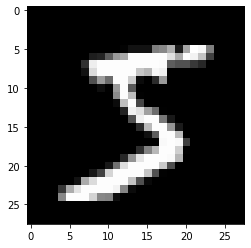

In [95]:
plt.imshow(X[0].reshape(28, 28), cmap = 'gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

In [100]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/7, random_state = 0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size = 64, shuffle = True)
loader_test = DataLoader(ds_test, batch_size = 64, shuffle = False)

In [104]:
from torch import nn
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [105]:
from torch import optim

#오차함수 선택
loss_fn = nn.CrossEntropyLoss()

#가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr= 0.01)

In [110]:
def train(epoch):
    model.train() #신경망을 학습 모드로 전환
    
    #데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:
        
        optimizer.zero_grad() # 경사를 0으로 초기화
        outputs = model(data) # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets) #출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward() #오차를 역전파
        optimizer.step() #역전파 계산한 값으로 가중치 수정
        
    print("epoch{} : 완료\n".format(epoch))

In [111]:
def test():
    model.eval() # 신경망을 추론 모드로 전환
    correct = 0
    
    #데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad(): #추론 과정에는 미분이 필요없음
        for data, targets in loader_test:
            
            outputs = model(data) #데이터를 입력하고 출력을 계산
            
            # 추론 계산
            _, predicted = torch.max(outputs.data, 1) #확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum() #정답과 일치한 경우 정답 카운트를 증가
            
    #정확도 출력
    data_num = len(loader_test.dataset)
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [112]:
test()


테스트 데이터에서 예측 정확도: 1040/10000 (10%)



In [113]:
for epoch in range(3):
    train(epoch)
    
test()

epoch0 : 완료

epoch1 : 완료

epoch2 : 완료


테스트 데이터에서 예측 정확도: 9519/10000 (95%)



In [ ]:
index = 2021

model.eval() # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data) #데이터 입력, 출력 계산
_, predicted = torch.max(output.data, 0) #확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}".format(y_test[index]))

## 과적합(OVerfittinf)을 막는 방법들

- 데이터의 양을 늘리기 - 데이터 증식 또는 증강(Data Augmentation)

데이터의 양이 적을 경우, 특정 패턴이나 노이즈까지 쉽게 암기 되므로 과적합이 쉽게 발생한다.
특히 이미지의 경우 데이터 증식을 통해 이를 해결하는데 이미지를 돌리거나, 노이즈를 추가, 일부분을 수정하는 방법이 사용된다.

- 모델의 복잡도 줄이기

인공신경망의 복잡도 : 은닉층의 수, 매개변수의 수 등으로 결정

이러한 인공신경망의 복잡도를 줄여야한다.

In [120]:
class Architecture1(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Architecture1, self).__init__
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out =self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [124]:
class Architecture1(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Architecture1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

위와 같이 3개의 선형 레이어를 2개의 선형 레이어로 줄임으로써 모델의 복잡도를 줄일 수 있다.

또한 인공신경망에서 모델이 있는 매개변수의 수를 모델의 수용력(capacity)러고도 한다.

- 가중치 규제(Regulation) 적용하기

복잡한 모델을 간단히 하는 방법으로 가중치 규제가 있습니다.<br>
두 식 모두 비용함수를 최소화하기 위해서 가중치 w들의 값이 작아져야 한다는 특징이 있다.<br>
또한 L1 규제는 어떠한 특성들이 모델에 영향을 주고 있는지를 판단하게 해주고, 이러한 판단이 필요 없다면 경험적으로 L2 규제가 더 잘 동작하므로 인공 신경망에서는 L2 규제를 가중치 감소라고 부른다.

## Norm, 노름
절대값을 이용하여 벡터의 길이 혹은 크기를 측정 하는 방법임 <br>
 ### L1 노름 ###
 L1 Norm  은 맨하튼 노름(Manhattan norm) 이라고 함,  L1 norm은 벡터 요소의 절대값을 합 <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$ L  =  \sum_{i}^N |x_i|$<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$ = |x_1| + |x_2| + |x_3| + ....|x_n|  $<br><br>
  벡터 x 의 L1 Norm은 아래와 같이 계산 됨<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$ x =[1,2,3,4,5] $ <br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ ||x||_1 = (|1| + |2| + |3| + |4| + |5|)  = 15$ <br><br>
   아래의 영역에서 사용됨 <br>
   - L1 regularization
   - computer Vision

### L2 Norm ###
L2 Norm 은 n 차원 좌표평면(유클리드 공간)에서 벡터의 크기를 계산하기 때문에 유클리드 노름(Euclidean norm) 이라고 함 <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ L2 = \sqrt{ \sum_{i}^n |x_i|^2 }  $ <br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; =  $ \sqrt{x \cdot x } $ <br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  =  $ \sqrt{x^T \cdot x } $ <br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; = $ \sqrt{x_1 * x_1 + x_2 * x_2 + x_3 * x_3 + ... + x_n * x_n) } $ <br><br>
  벡터 x의 L Norm은 다음과 같이 계산됨<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   $ x = [1,2,3,4,5 ] $ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   $ ||x||_2  =  \sqrt{|1|^2 + |2|^2 + |3|^2 + |4|^2 + |5|^2 } $<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;  $ = \sqrt{1+ 4 + 9 + 16 + 25}  $ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp; 
$= \sqrt{55} = 7.4161 $  <br>
L2 Norm 은 아래의 영역에서 사용
- L2 regularization
- kNN 알고리즘
- kmean 알고리즘


In [127]:
#파이토치에서는 옵티마이저의 weight_decay 매개변수를 설정하므로서 L2 규제를 적용합니다.
model = Architecture1(10, 20, 2)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4, weight_decay=1e-5)

### 드롭아웃(Dropout)
- 드롭아웃은 학습 과정에서 신경망의 일부를 사용하지 않는 방법이다.<br>
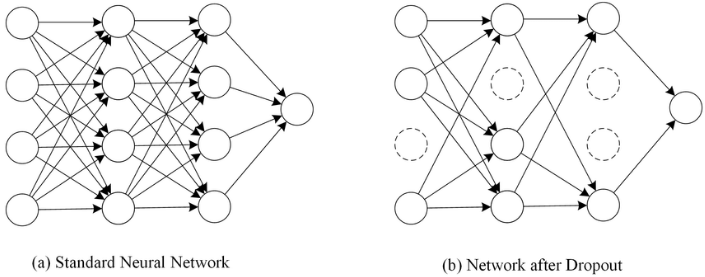<br>
보통 신경망 학습시에 사용하고, 예측시에는 사용하지 않는다. 학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적인 것을 방지해주고,서로 다른 신경망을 앙상블하여 사용하는것 같은 효과를 주어 과적합을 방지합니다.

## 기울기 소실(Gradient Vanishing)과 폭주(Exploding)
- 기울기 소실 : 입력층에 가까운 층들에서 가중치들이 업데이트가 제대로 되지 않는 현상
- 기울기 폭주 : 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 ㅠ발산하는 현상 -> RNN에서 발생할수 있음.

#### 기울기 소실 해결 방법
- ReLU와 ReLU의 변형 함수들 이용하기<br>
즉 은닉층에 시그모이드 함수를 사용하지 않아야 한다.
- 가중치 초기화(Weight initialization)<br>
훈련 초기에 어떠한 값을 가졌느냐도 모델의 훈련 결과에 영향을 끼침